In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('Customer Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [11]:
# replacing blanks with zero
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
 # coverting data type
df['TotalCharges']=df['TotalCharges'].astype('float')
print(df.isnull().sum().sum())
print(df)

0
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1      

In [13]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [15]:
print(df.duplicated().sum())
# Converted senior citizen to yes and no
def conv(value):
    if value==1:
        return 'yes'
    else:
        return'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
print(df.head(30))


0
    customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female            no     Yes         No       1           No   
1   5575-GNVDE    Male            no      No         No      34          Yes   
2   3668-QPYBK    Male            no      No         No       2          Yes   
3   7795-CFOCW    Male            no      No         No      45           No   
4   9237-HQITU  Female            no      No         No       2          Yes   
5   9305-CDSKC  Female            no      No         No       8          Yes   
6   1452-KIOVK    Male            no      No        Yes      22          Yes   
7   6713-OKOMC  Female            no      No         No      10           No   
8   7892-POOKP  Female            no     Yes         No      28          Yes   
9   6388-TABGU    Male            no      No        Yes      62          Yes   
10  9763-GRSKD    Male            no     Yes        Yes      13          Yes   
11  7469-LKBCI    Male            no  

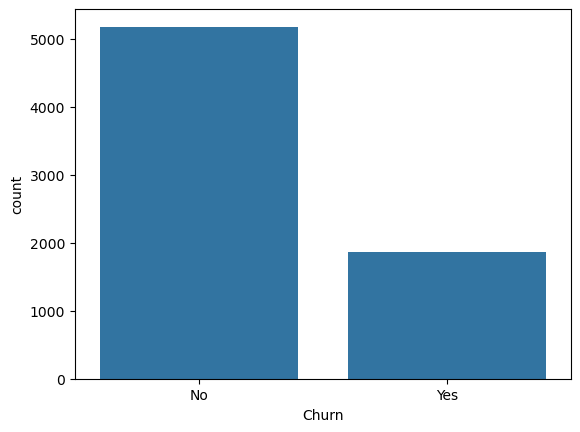

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

In [21]:
sns.countplot(x='Churn',data=df)
plt.show() 
plt.figure(figsize=(3,4))

       Churn
Churn       
No      5174
Yes     1869


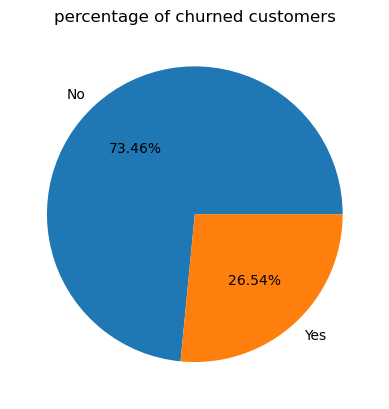

In [25]:
gb=df.groupby('Churn').agg({'Churn':'count'})
print(gb)
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title('percentage of churned customers',fontsize=12)
plt.show()
# from our analysis we conclude that 26.54 percent people churned out now we will se why they churned out


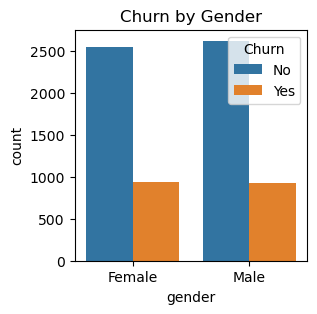

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title('Churn by Gender')
plt.show()


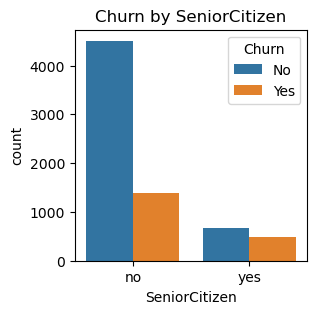

In [29]:
# analyaze churn by seniority
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title('Churn by SeniorCitizen')
plt.show()

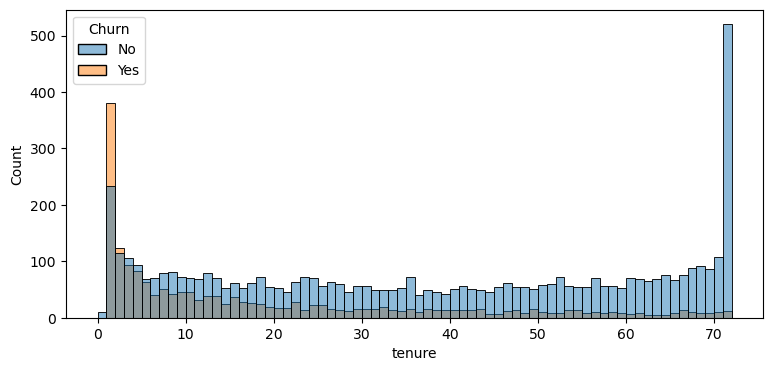

In [33]:
# now we are checking for tenure
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue="Churn")
plt.show()
# people who have long tenure dont churn

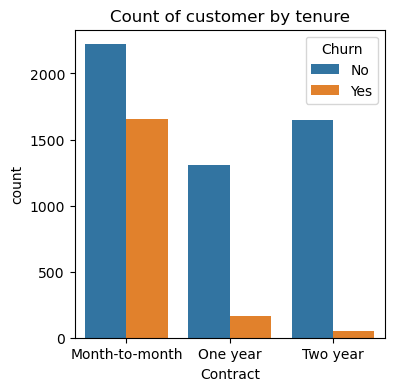

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x="Contract",data=df, hue='Churn')
plt.title('Count of customer by tenure')
plt.show()
# people who have contract of  1 month churn out mostly


['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn' 'tenure_group']


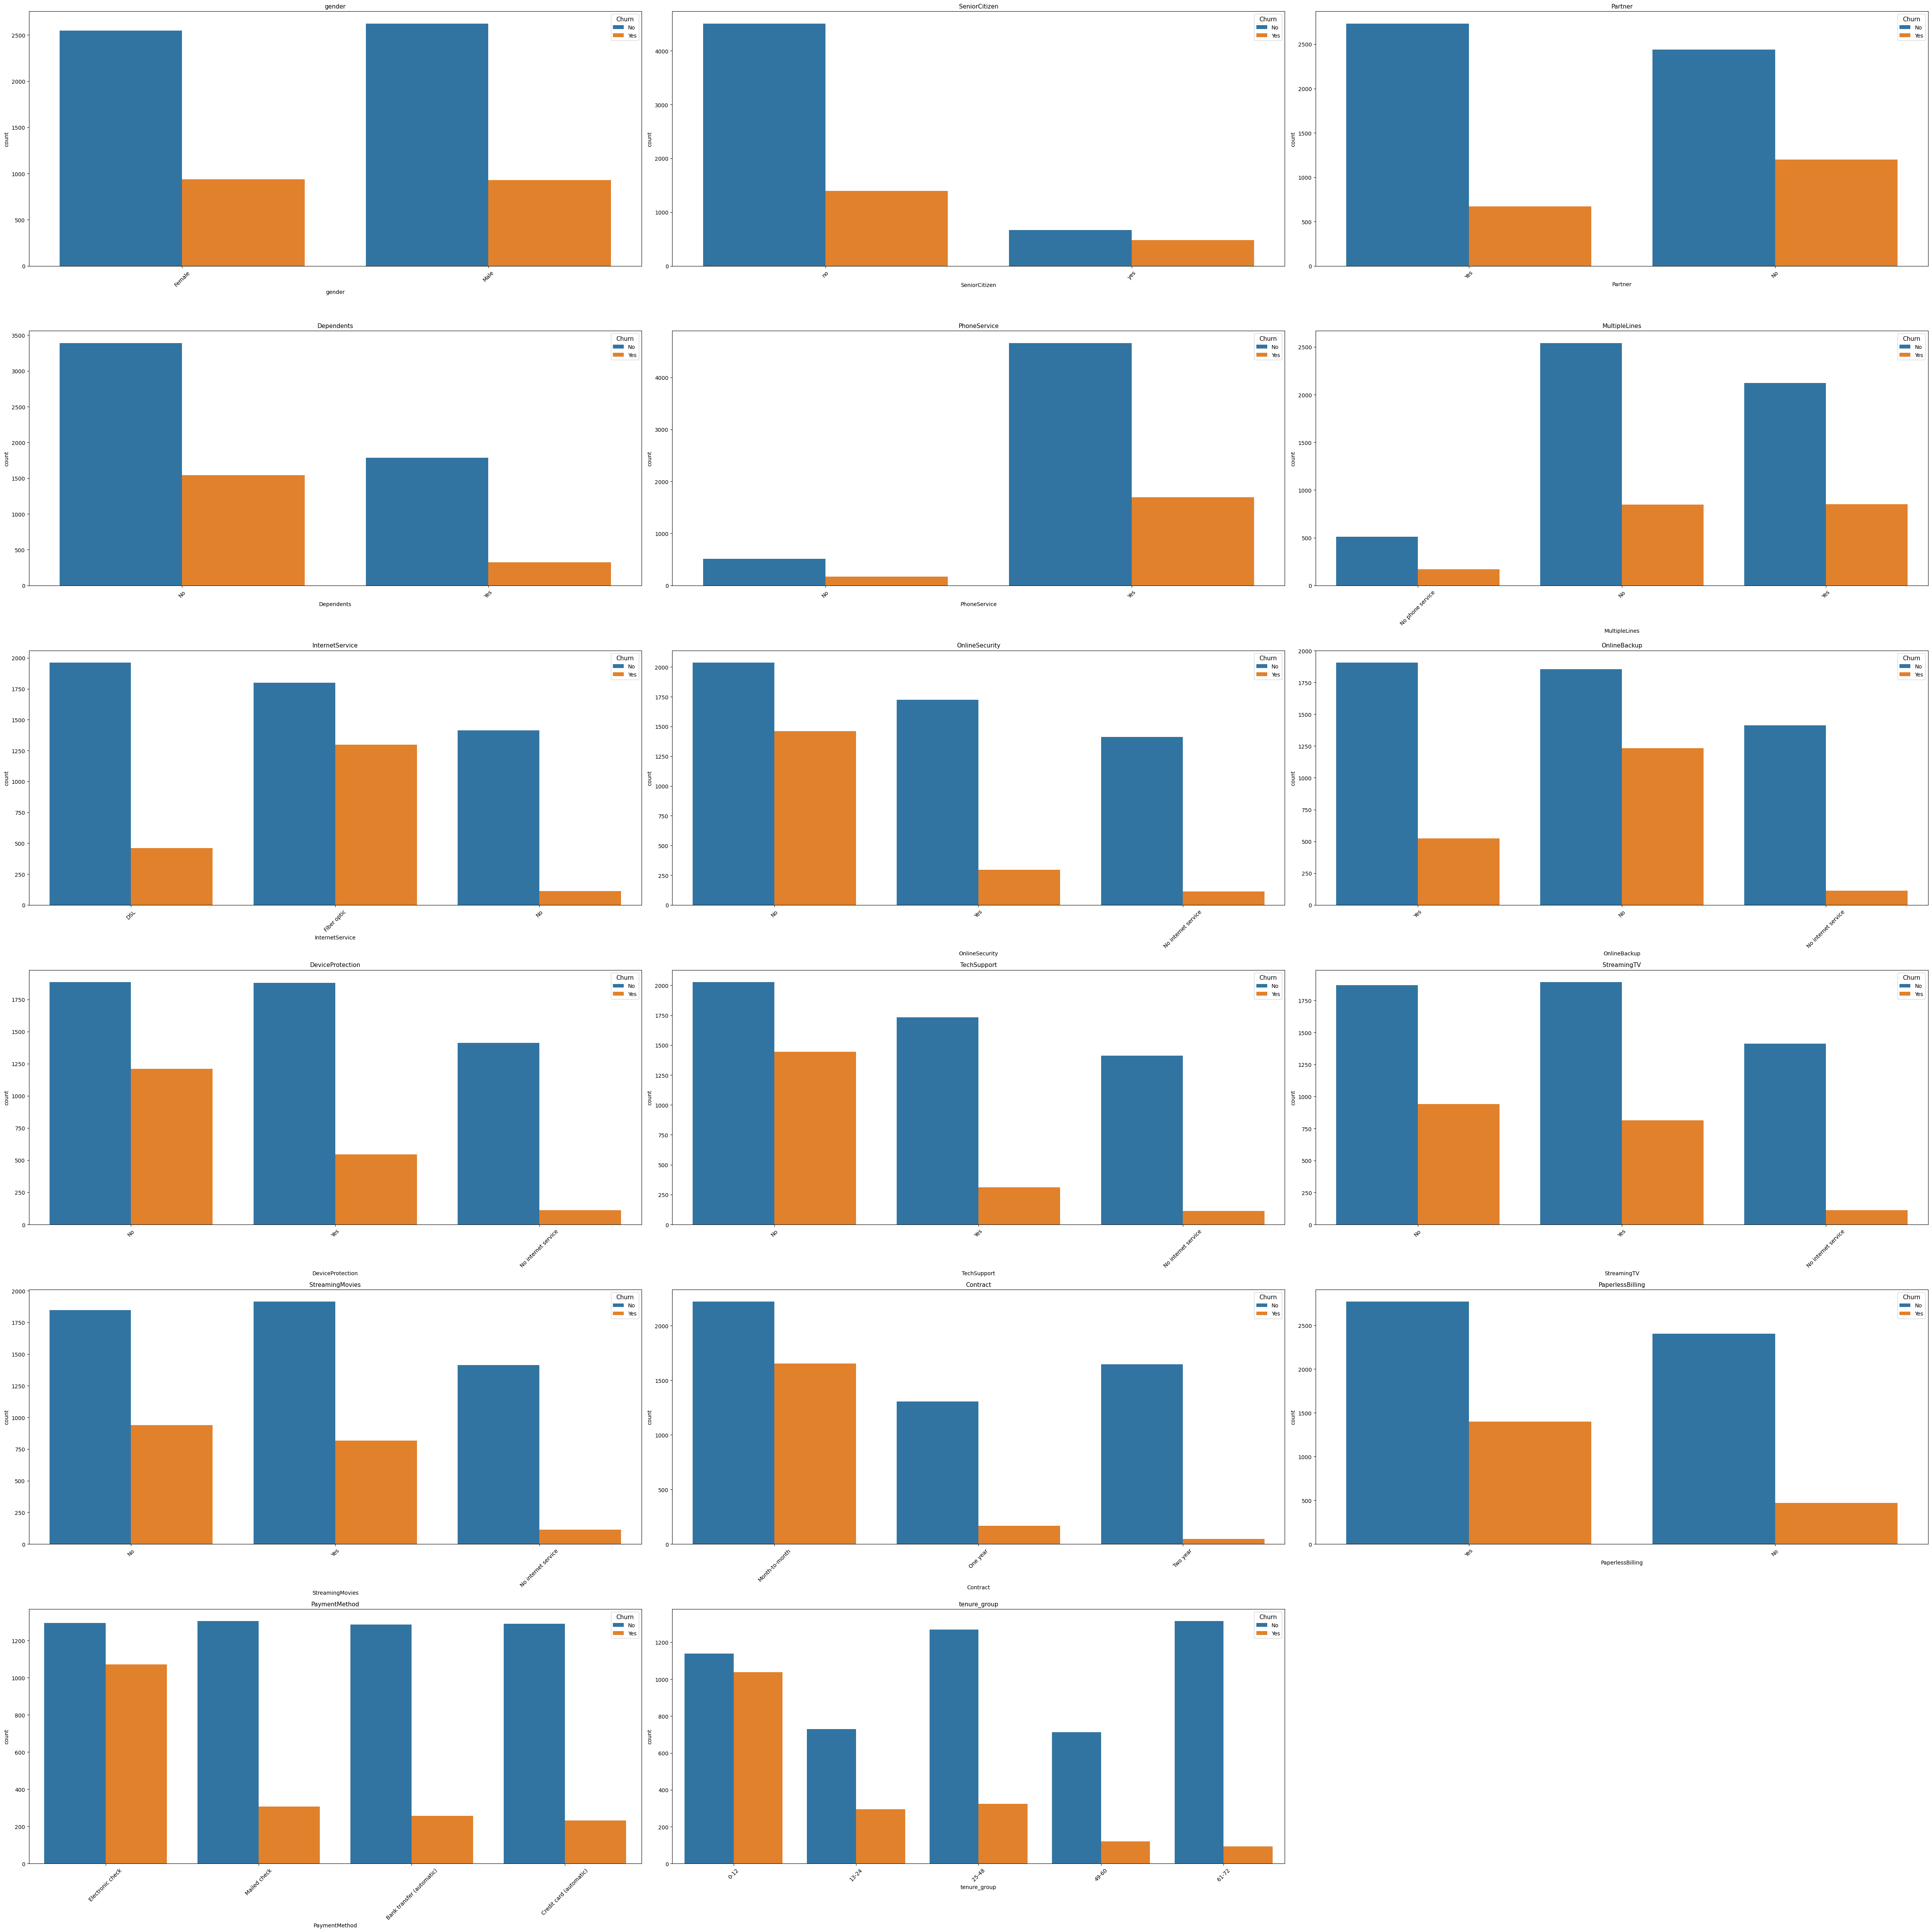

In [44]:
print(df.columns.values)


df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group'
]


n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, 50))  # Large canvas
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right', fontsize=10, title_fontsize=11)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.savefig('churn_categorical_plot.png', dpi=300, bbox_inches='tight')

plt.show()



In [45]:
plt.show()